In [1]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [2]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [6]:
dhours=[]
dcnt=[]
opath='xst_mean'
fpath='xst'
dateformat='%Y-%m-%d-%H-%M'
dateformat2='%Y-%m-%d-%H'
from datetime import datetime,timedelta
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        #dtime=dtime+timedelta(hours=10/60)
        fhour=dtime.strftime(dateformat2)
        #print(band,ftime,dtime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

51204
['2022-11-11-00', '2022-11-11-01', '2022-11-11-02', '2022-11-11-03', '2022-11-11-04', '2022-11-11-06', '2022-11-11-07', '2022-11-11-08', '2022-11-11-09', '2022-11-11-10', '2022-11-11-11', '2022-11-11-12', '2022-11-11-14', '2022-11-11-15', '2022-11-11-16', '2022-11-11-17', '2022-11-11-18', '2022-11-11-19', '2022-11-11-20', '2022-11-11-22', '2022-11-11-23', '2022-11-12-00', '2022-11-12-01', '2022-11-12-02', '2022-11-12-03', '2022-11-12-04', '2022-11-12-06', '2022-11-12-07', '2022-11-12-08', '2022-11-12-09', '2022-11-12-10', '2022-11-12-11', '2022-11-12-12', '2022-11-12-13', '2022-11-12-15', '2022-11-12-16', '2022-11-12-17', '2022-11-12-18', '2022-11-12-19', '2022-11-12-20', '2022-11-12-21', '2022-11-12-23', '2022-11-13-00', '2022-11-13-01', '2022-11-13-02', '2022-11-13-03', '2022-11-13-04', '2022-11-13-05', '2022-11-13-07', '2022-11-13-08', '2022-11-13-09', '2022-11-13-10', '2022-11-13-11', '2022-11-13-12', '2022-11-13-13', '2022-11-13-15', '2022-11-13-16', '2022-11-13-17', '2022-1

In [9]:
#sis=[i for i in range(18)]
meas_RCU2L = [0, 1, 2,3,4,5,8,9,10,11]
sis = [3*i+j for i in meas_RCU2L for j in range(3)]

#sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
nsi=len(sis)

for ic,shour in enumerate(dhours[:]):
    if dcnt[ic]!=512: continue;
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        dtime=dtime+timedelta(hours=10/60)
        fhour=dtime.strftime(dateformat2)
#        fhour=ftime[:-3]
        if fhour!=shour: continue;
        try:
          D=loadXST(fpath+"/"+fn,sis);
        except:
          continue;
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-11-11-00 11 0
2022-11-11-01 11 1
2022-11-11-02 11 2
2022-11-11-03 11 3


/tmp/ipykernel_1143471/3316914112.py:34: RuntimeWarning: invalid value encountered in true_divide
  xst/=cnt[:,np.newaxis,np.newaxis];


2022-11-11-06 11 6
2022-11-11-07 11 7
2022-11-11-08 11 8
2022-11-11-09 11 9
2022-11-11-10 11 10
2022-11-11-11 11 11
2022-11-11-14 11 14
2022-11-11-15 11 15
2022-11-11-16 11 16
2022-11-11-17 11 17
2022-11-11-18 11 18
2022-11-11-19 11 19
2022-11-11-22 11 22
2022-11-11-23 11 23
2022-11-12-00 12 0
2022-11-12-01 12 1
2022-11-12-02 12 2
2022-11-12-03 12 3
2022-11-12-04 12 4
2022-11-12-07 12 7
2022-11-12-08 12 8
2022-11-12-09 12 9
2022-11-12-10 12 10
2022-11-12-11 12 11
2022-11-12-12 12 12
2022-11-12-15 12 15
2022-11-12-16 12 16
2022-11-12-17 12 17
2022-11-12-18 12 18
2022-11-12-19 12 19
2022-11-12-20 12 20
2022-11-12-23 12 23
2022-11-13-00 13 0
2022-11-13-01 13 1
2022-11-13-02 13 2
2022-11-13-03 13 3
2022-11-13-04 13 4
2022-11-13-07 13 7
2022-11-13-08 13 8
2022-11-13-09 13 9
2022-11-13-10 13 10
2022-11-13-11 13 11
2022-11-13-12 13 12
2022-11-13-13 13 13
2022-11-13-16 13 16
2022-11-13-17 13 17
2022-11-13-18 13 18
2022-11-13-19 13 19
2022-11-13-20 13 20
2022-11-13-21 13 21
2022-11-14-00 14 0
2

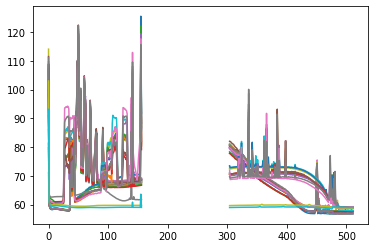

In [10]:
for si in range(len(sis)):
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [11]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
